In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn import datasets

In [12]:
df = pd.read_csv(r"C:\Users\Shrushti\Desktop\movies.csv")

In [13]:
df.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [14]:
null_percentage = (df.isnull().sum() / len(df)) * 100
null_percentage

name         0.000000
rating       1.004173
genre        0.000000
year         0.000000
released     0.026082
score        0.039124
votes        0.039124
director     0.000000
writer       0.039124
star         0.013041
country      0.039124
budget      28.312467
gross        2.464789
company      0.221701
runtime      0.052165
dtype: float64

In [15]:
columns_to_clean = ['rating', 'star', 'country', 'writer', 'company', 'runtime','gross','score','votes']
movies_df = df.dropna(subset=columns_to_clean)


In [16]:
movies_df.isnull().sum()

name           0
rating         0
genre          0
year           0
released       0
score          0
votes          0
director       0
writer         0
star           0
country        0
budget      1991
gross          0
company        0
runtime        0
dtype: int64

In [17]:

correlation = movies_df['budget'].corr(movies_df['gross'])
print(f"Correlation coefficient between budget and gross: {correlation}")

Correlation coefficient between budget and gross: 0.740246543921963


#The correlation coefficient between budget and gross is approximately 0.7402. This positive correlation value suggests a relatively strong positive linear relationship between the budget and gross revenue of movies in the dataset. As the budget increases, there is a tendency for the gross revenue to also increase, and vice versa. 

In [18]:
# Cleaning with regression model Bayesian Ridge imputation
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge

missing_vars = ['budget']

predictor_vars = ['gross']

# Fit regression model using Bayesian Ridge
imputer = IterativeImputer(estimator=BayesianRidge())

# Impute missing values
imputed_data = imputer.fit_transform(movies_df[predictor_vars + missing_vars])

# Substitute imputed values for missing values
movies_df[missing_vars] = imputed_data[:, -len(missing_vars):]

C:\Users\Shrushti\AppData\Local\Temp\ipykernel_22884\1968467833.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_df[missing_vars] = imputed_data[:, -len(missing_vars):]


In [19]:
movies_df.isnull().sum()

name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64

In [20]:
df.describe()



,year,score,votes,budget,gross,runtime
count,7668.000000,7665.000000,7.665000e+03,5.497000e+03,7.479000e+03,7664.000000
mean,2000.405451,6.390411,8.810850e+04,3.558988e+07,7.850054e+07,107.261613
std,11.153508,0.968842,1.633238e+05,4.145730e+07,1.657251e+08,18.581247
min,1980.000000,1.900000,7.000000e+00,3.000000e+03,3.090000e+02,55.000000
25%,1991.000000,5.800000,9.100000e+03,1.000000e+07,4.532056e+06,95.000000
50%,2000.000000,6.500000,3.300000e+04,2.050000e+07,2.020576e+07,104.000000
75%,2010.000000,7.100000,9.300000e+04,4.500000e+07,7.601669e+07,116.000000
max,2020.000000,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,366.000000


In [21]:
#exploring distribution and outliers 

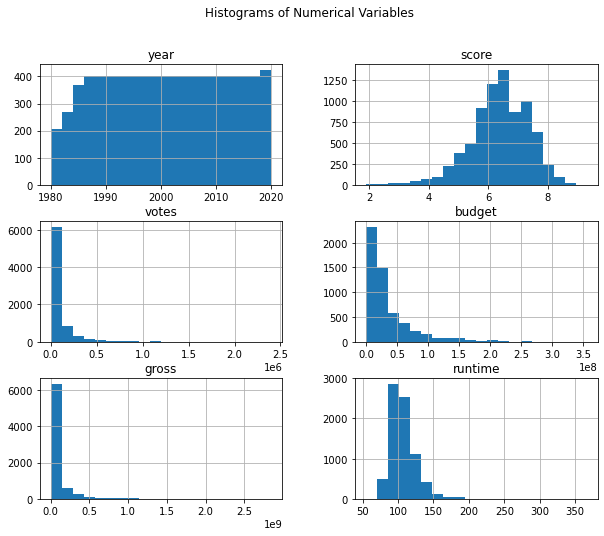

In [22]:
# Exploring Numerical Variables:
# Visualize the distribution of numerical variables using histograms density plots.
df.hist(figsize=(10, 8), bins=20)
plt.suptitle('Histograms of Numerical Variables')
plt.show()


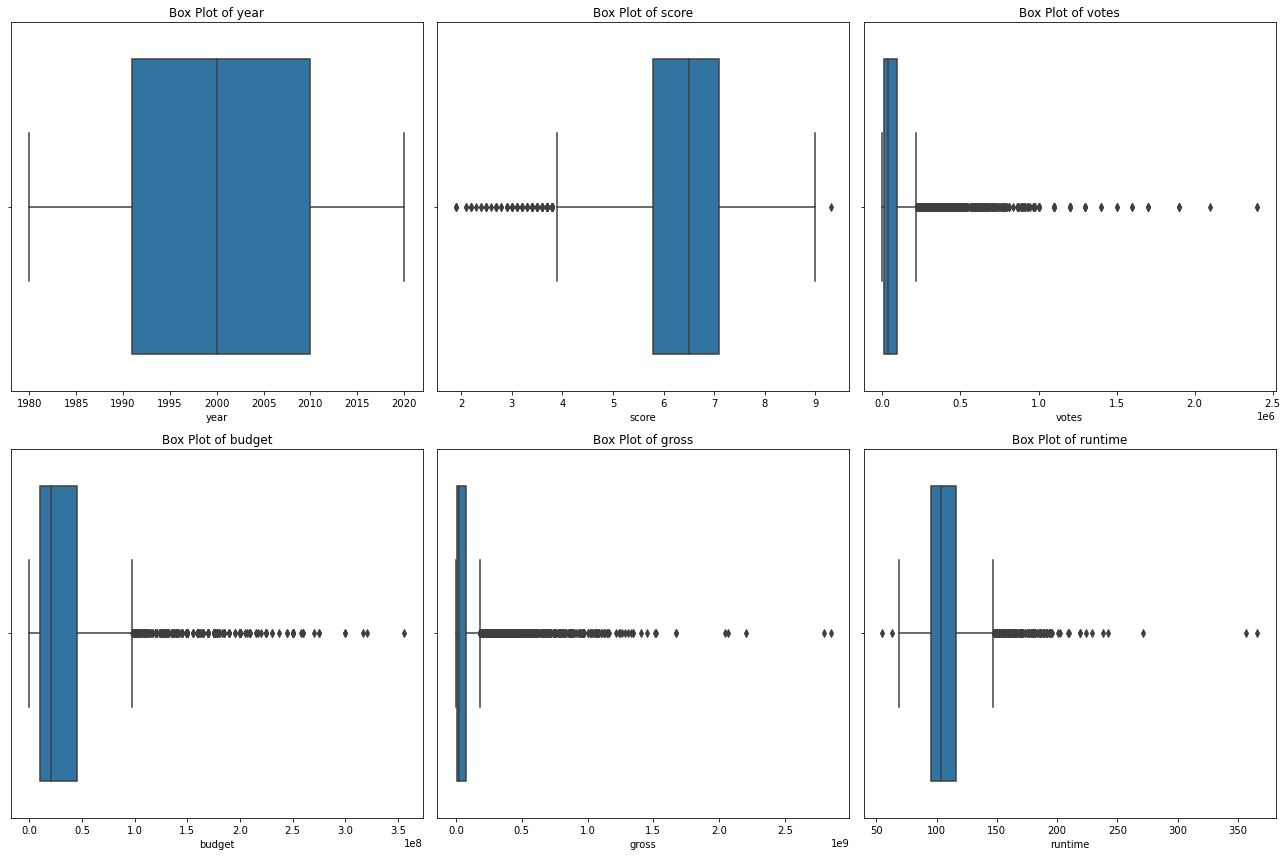

In [23]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

fig, axes = plt.subplots(2, 3, figsize=(18, 12))

axes = axes.flatten()

# Plot box plots for each numerical column to search for outliers
for i, col in enumerate(numerical_cols):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'Box Plot of {col}')

plt.tight_layout()
plt.show()

EDA

In [24]:
# What is the distribution of movie ratings in the dataset?

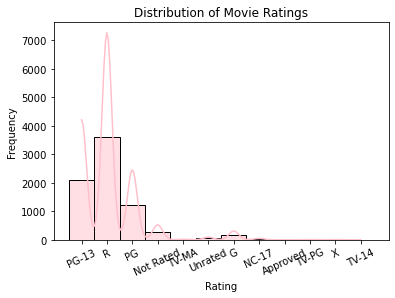

In [30]:
sns.histplot(movies_df['rating'], bins=50, kde=True, color = 'pink')
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.xticks(rotation=25)
plt.ylabel('Frequency')
plt.show()

In [31]:
# Comparison of Gross and Budget across different Genre

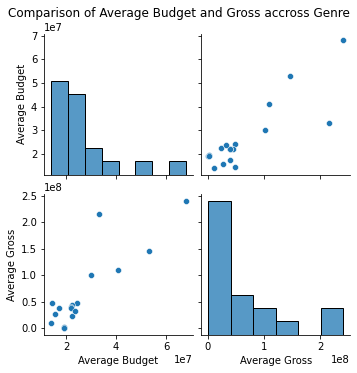

In [44]:
genre_gross = movies_df.groupby('genre')['gross'].mean().sort_values(ascending=False)
genre_budget = movies_df.groupby('genre')['budget'].mean().sort_values(ascending=False)

# Combine budget and gross into a single DataFrame
genre_data = pd.DataFrame({'Average Budget': genre_budget, 'Average Gross': genre_gross})

# Create a pair plot
sns.pairplot(genre_data, palette={'Average Budget': 'skyblue', 'Average Gross': 'orange'})
plt.suptitle('Comparison of Average Budget and Gross accross Genre', y=1.02)
plt.show()

In [ ]:
#Top 10 Countries with the Highest Economic Output

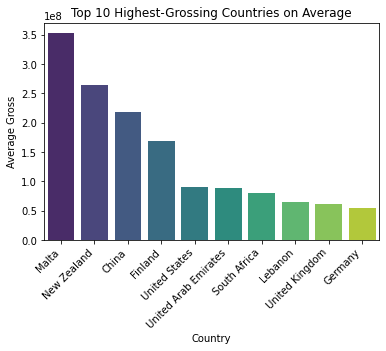

In [33]:
country_avg_gross = movies_df.groupby('country')['gross'].mean().sort_values(ascending=False)

top_countries = country_avg_gross.head(10)

sns.barplot(x=top_countries.index, y=top_countries.values, palette='viridis')
plt.title('Top 10 Highest-Grossing Countries on Average')
plt.xlabel('Country')
plt.ylabel('Average Gross')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

In [ ]:
# How does the runtime of movies vary across different genres?


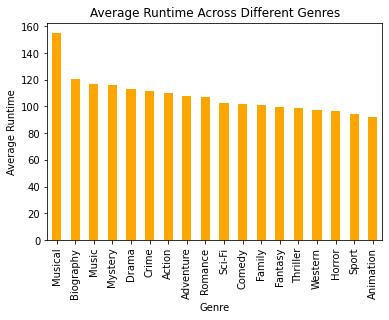

In [34]:

genre_runtime = movies_df.groupby('genre')['runtime'].mean().sort_values(ascending=False)
genre_runtime.plot(kind='bar', color='orange')
plt.title('Average Runtime Across Different Genres')
plt.xlabel('Genre')
plt.ylabel('Average Runtime')
plt.show()

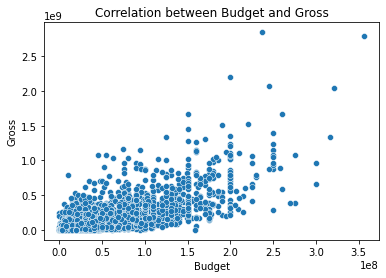

In [35]:
# Is there a correlation between the budget and gross of movies?
sns.scatterplot(x='budget', y='gross', data=movies_df)
plt.title('Correlation between Budget and Gross')
plt.xlabel('Budget')
plt.ylabel('Gross')
plt.show()

In [36]:
# What is the most common genre in the dataset?
most_common_genre = movies_df['genre'].value_counts().idxmax()
most_common_genre

'Comedy'

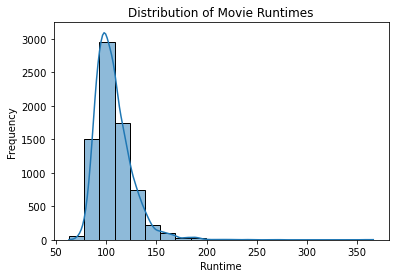

In [37]:
# What is the distribution of movie runtimes?
sns.histplot(movies_df['runtime'], bins=20, kde=True)
plt.title('Distribution of Movie Runtimes')
plt.xlabel('Runtime')
plt.ylabel('Frequency')
plt.show()

In [38]:
#Box Office Titans: The Top 5 Profit-Driven Directors

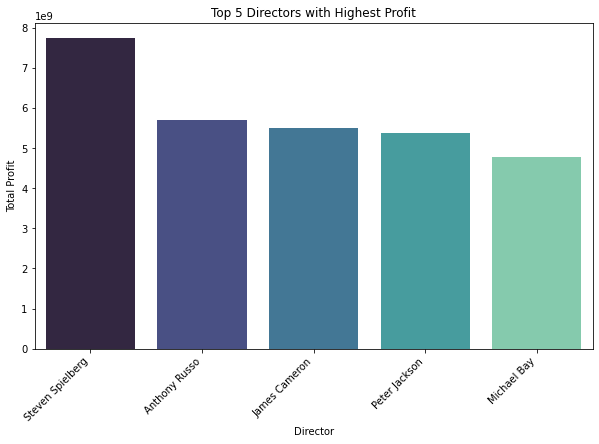

In [39]:
movies_df['profit'] = movies_df['gross'] - movies_df['budget']

# Group by director and calculate the total profit for each
director_profit = movies_df.groupby('director')['profit'].sum().sort_values(ascending=False)

top_directors = director_profit.head(5)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_directors.index, y=top_directors.values, palette='mako')
plt.title('Top 5 Directors with Highest Profit')
plt.xlabel('Director')
plt.ylabel('Total Profit')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

In [ ]:
#the most successful director-star combination

In [40]:
director_star_profit = movies_df.groupby(['director', 'star'])['profit'].sum().sort_values(ascending=False)

most_successful_combination = director_star_profit.idxmax()

print(f"The most successful director-star combination is: {most_successful_combination}")

The most successful director-star combination is: ('Anthony Russo', 'Robert Downey Jr.')


In [41]:
threshold_rating = 7.5

# Filter movies based on profit and rating criteria
selected_movies = movies_df[(movies_df['profit'] > 500000000) & (movies_df['score'] < threshold_rating)]

print("Movies with profit > $500 million and rating below", threshold_rating)
print(selected_movies[['name', 'profit', 'score', 'country']])

Movies with profit > $500 million and rating below 7.5
                                    name        profit  score         country
6061              The Amazing Spider-Man  5.279307e+08    6.9   United States
6478            The Amazing Spider-Man 2  5.089823e+08    6.6   United States
6479                          Maleficent  5.784118e+08    7.0   United States
6870  Batman v Superman: Dawn of Justice  6.236375e+08    6.4   United States
6123  Madagascar 3: Europe's Most Wanted  6.019213e+08    6.8   United States
...                                  ...           ...    ...             ...
6646                           Furious 7  1.325341e+09    7.1   United States
7055             The Fate of the Furious  9.860051e+08    6.6           China
2844                    Independence Day  7.424009e+08    7.0   United States
6844                       Suicide Squad  5.718469e+08    5.9   United States
7481                             Aladdin  8.676940e+08    6.9  United Kingdom

[84 rows

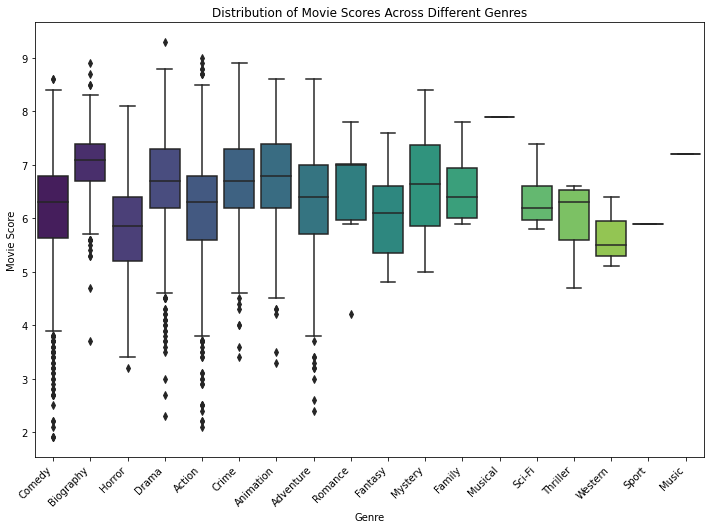

In [42]:
plt.figure(figsize=(12, 8))

# Create a box plot
sns.boxplot(x='genre', y='score', data=movies_df, palette='viridis')

# Set plot labels and title
plt.title('Distribution of Movie Scores Across Different Genres')
plt.xlabel('Genre')
plt.ylabel('Movie Score')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

In [43]:
movies_df = movies_df.sort_values(by=['star', 'year'])

movies_df['profit'] = movies_df['gross'] - movies_df['budget']
# Create a new column to identify consecutive hits for each star
movies_df['consecutive_hits'] = movies_df.groupby('star')['profit'].transform(
    lambda x: (x > 50000000).rolling(window=6, min_periods=6).sum()
)

# Filter for stars with consecutive 6 or more hit movies
stars_with_consecutive_6_or_more_hits = movies_df[
    (movies_df['consecutive_hits'] >= 6)
]['star'].unique()

# Display the list of stars with consecutive 6 or more hit movies
print("Stars with Consecutive 6 or More Hits (Profit > $50,000,000):", stars_with_consecutive_6_or_more_hits)

Stars with Consecutive 6 or More Hits (Profit > $50,000,000): ['Adam Sandler' 'Ben Stiller' 'Chris Pratt' 'Daniel Radcliffe'
 'Denzel Washington' 'Dwayne Johnson' 'Hugh Jackman' 'Jim Carrey'
 'Johnny Depp' 'Leonardo DiCaprio' 'Mark Wahlberg' 'Mel Gibson'
 'Robert Downey Jr.' 'Tom Cruise' 'Tom Hanks' 'Vin Diesel' 'Will Smith']
